# Дискретные случайные процессы и временные ряды, DS-поток
## Задание TS.3
### Временные ряды. Модели типа ARIMA.

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.** 
  * Задача 1 &mdash; 150 баллов.

In [1]:
# Bot check

# HW_ID: ds_ts3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import pyreadr
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.stats.multitest import multipletests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from pylab import rcParams
rcParams["figure.figsize"] = 15,7
import warnings
warnings.filterwarnings("ignore")

### Задача 1

__1.__ Загрузите файл `electricity.csv` (<a href="https://rdrr.io/cran/stR/man/electricity.html">источник</a>) c информацией о максимальном спросе на электричество (`Consumption`) в штате Виктория (Австралия) за 30-минутные интервалы с 10 января 2000 в течении 115 дней, а так же информация о температуре воздуха (`Temperature`) за эти же промежутки времени.

In [3]:
df = pyreadr.read_r('electricity.RData')["electricity"]
df.head(3)

,Consumption,Temperature,Time,DailySeasonality,WeeklySeasonality,WorkingDaySeasonality
0,3853.475392,20.9,0.0,0.0,48.0,0.0
1,3683.014105,20.7,1.0,1.0,49.0,1.0
2,3912.324031,20.5,2.0,2.0,50.0,2.0


__2.__ Нарисуйте графики временных рядов температуры и потребления электричества. Верно ли, что спрос на электричество зависит от температуры воздуха? Для ответа на вопрос используйте коэффициенты корреляции, учитывая условия их применимости.

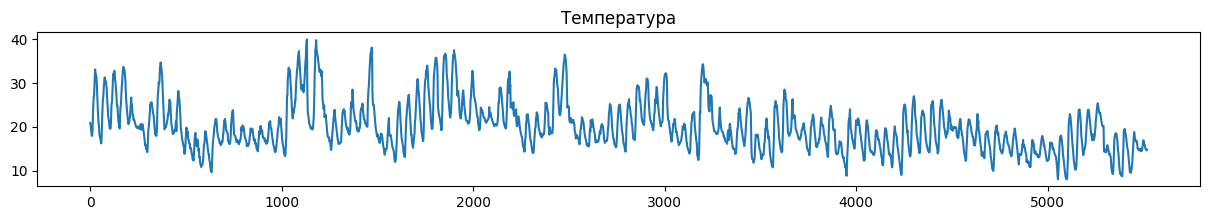

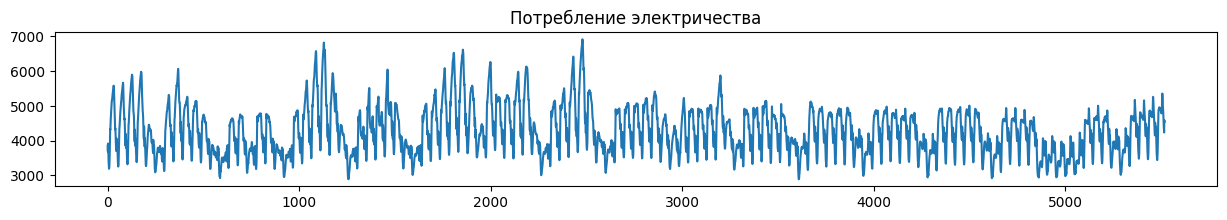

In [4]:
def plot(title, x):
    plt.figure(figsize=(15,2))
    plt.title(title)
    plt.plot(x)
    plt.show()

for title,col in zip(['Температура','Потребление электричества'],['Temperature','Consumption']):
    plot(title, df[col])

*В обоих случаях видна дневная сезонность, в электричестве - еще и недельная.*  
  
*Корреляции:*  
*1) Для Пирсона требуется нормальность, проверим ее тестом Шапиро-Уилка*

In [5]:
for title,col in zip(['Температура','Потребление электричества'],['Temperature','Consumption']):
    _, p = sps.shapiro(df[col])
    print(f'{title} распр.{" НЕ " if p<0.05 else " "}нормально')

Температура распр. НЕ нормально
Потребление электричества распр. НЕ нормально


*Нормальности нет, значит Пирсон не сработает*   
*2) тогда нужен Спирмен*

In [6]:
print(f"К-т корреляции температуры и потребления электричества: {df['Consumption'].corr(df['Temperature'], method='spearman'):.2f}")

К-т корреляции температуры и потребления электричества: 0.58


*0.58 говорит о корреляции средней силы. То есть спрос на электричество зависит от температуры воздуха. Это можно объяснить тем, что в жару нужны кондиционеры*

__3.__ Разделите временной ряд на две части:
данные за последнюю неделю (последние $48\times7$ измерений) назовем тестовыми данными, а все остальное &mdash; обучающими данными.

In [7]:
train, test = df[:-48*7], df[-48*7:]

*Замечание. Пункты c аналитикой выполните для обучающих данных.*

__4__. Сколько типов сезонностей можно выделить в каждом из двух рядов &mdash; спрос на электричество и температура?
С помощью STL-декомпозиции и с помощью декомпозиции, основанной на скользящих средних, в каждом ряде выделите тренд, все типы сезонности, остатки. Сравните 2 метода друг с другом.

*Как заметили выше, в обоих случаях видна дневная сезонность, в электричестве - еще и недельная.*  

*STL:*

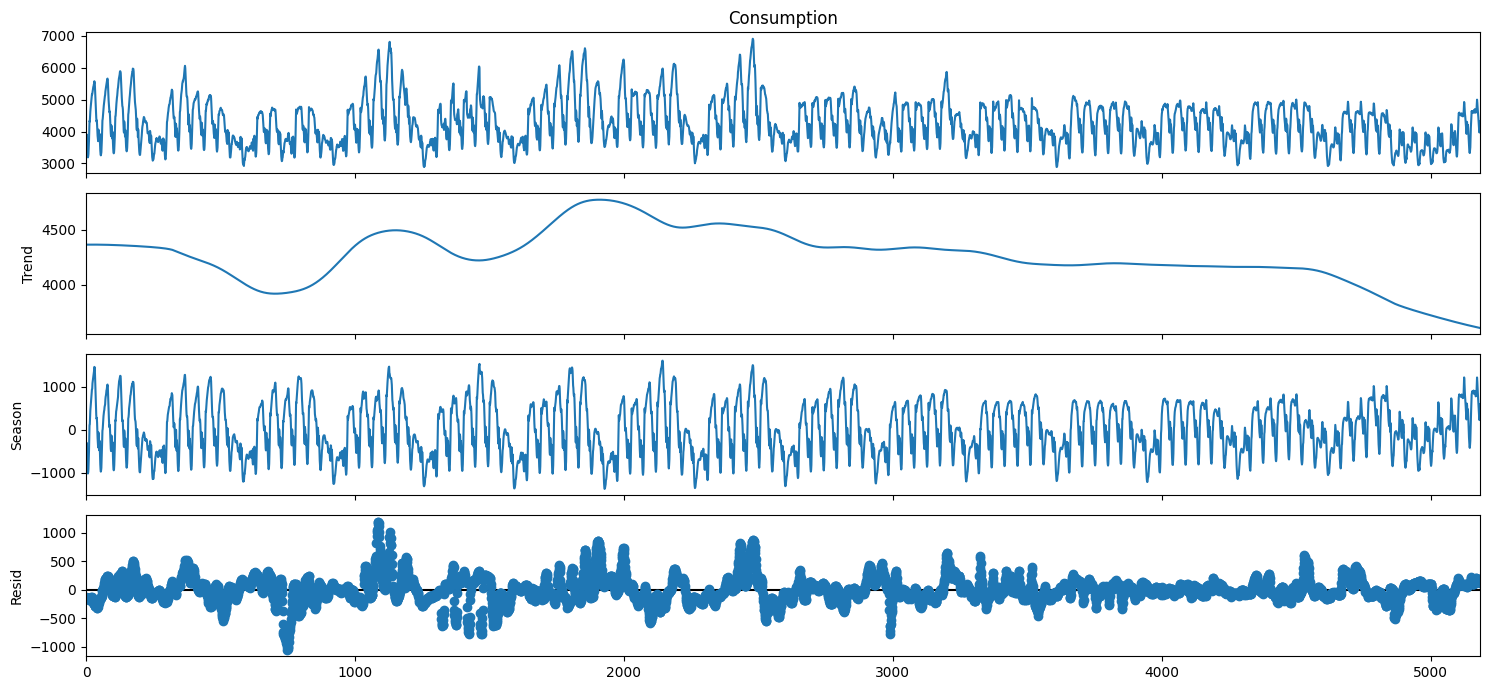

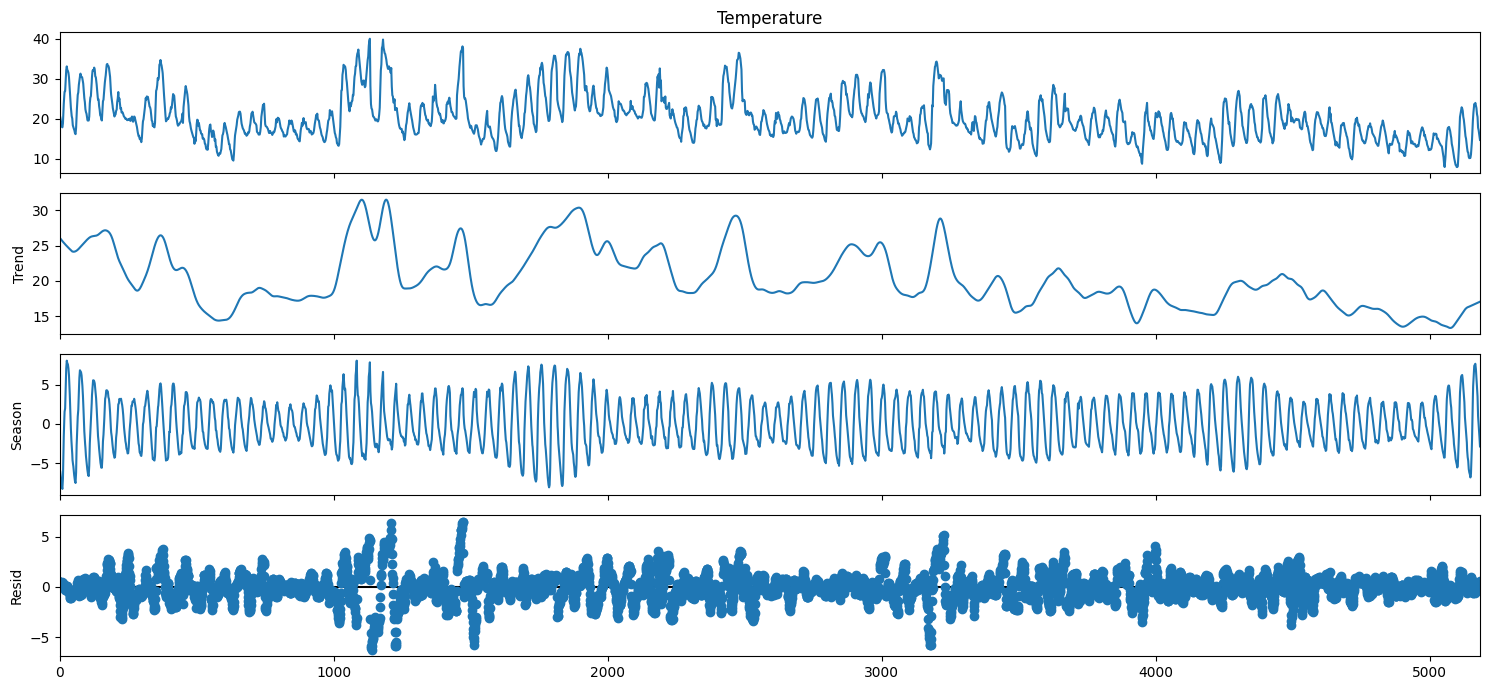

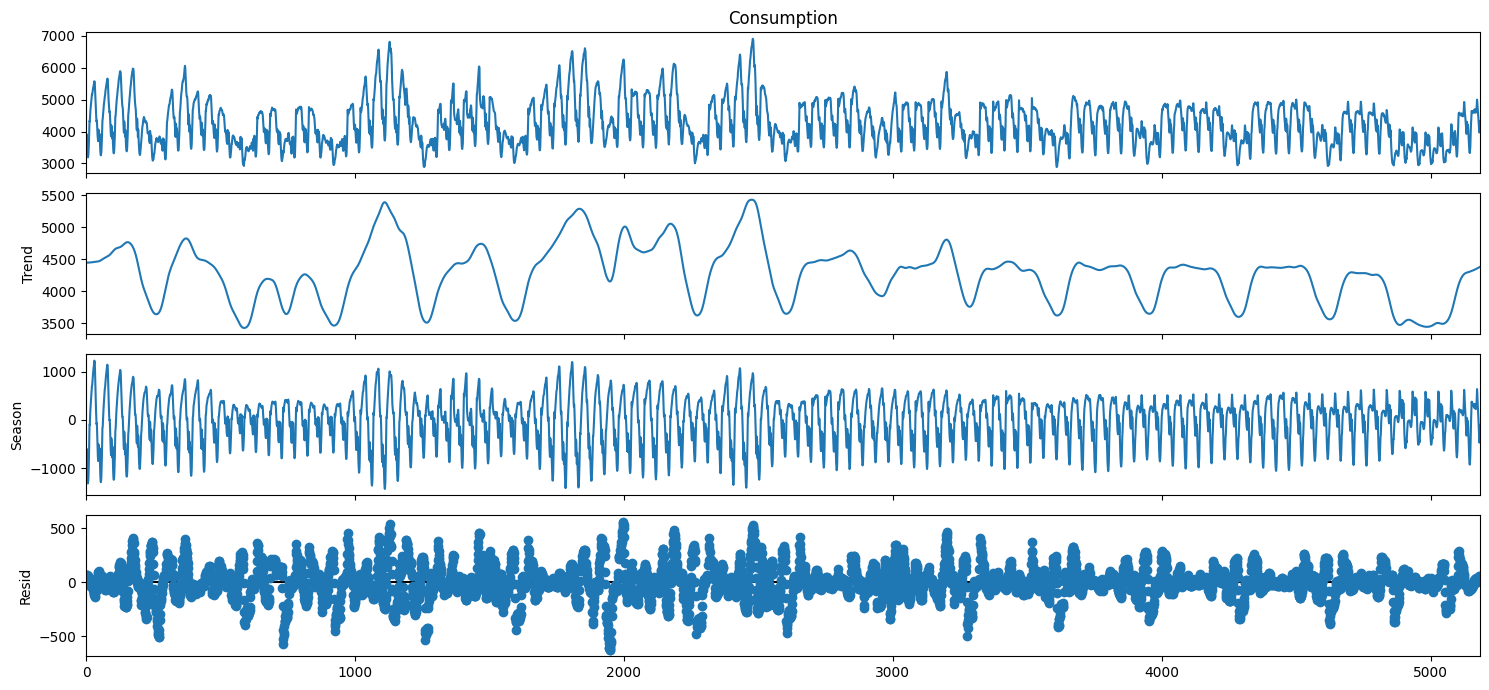

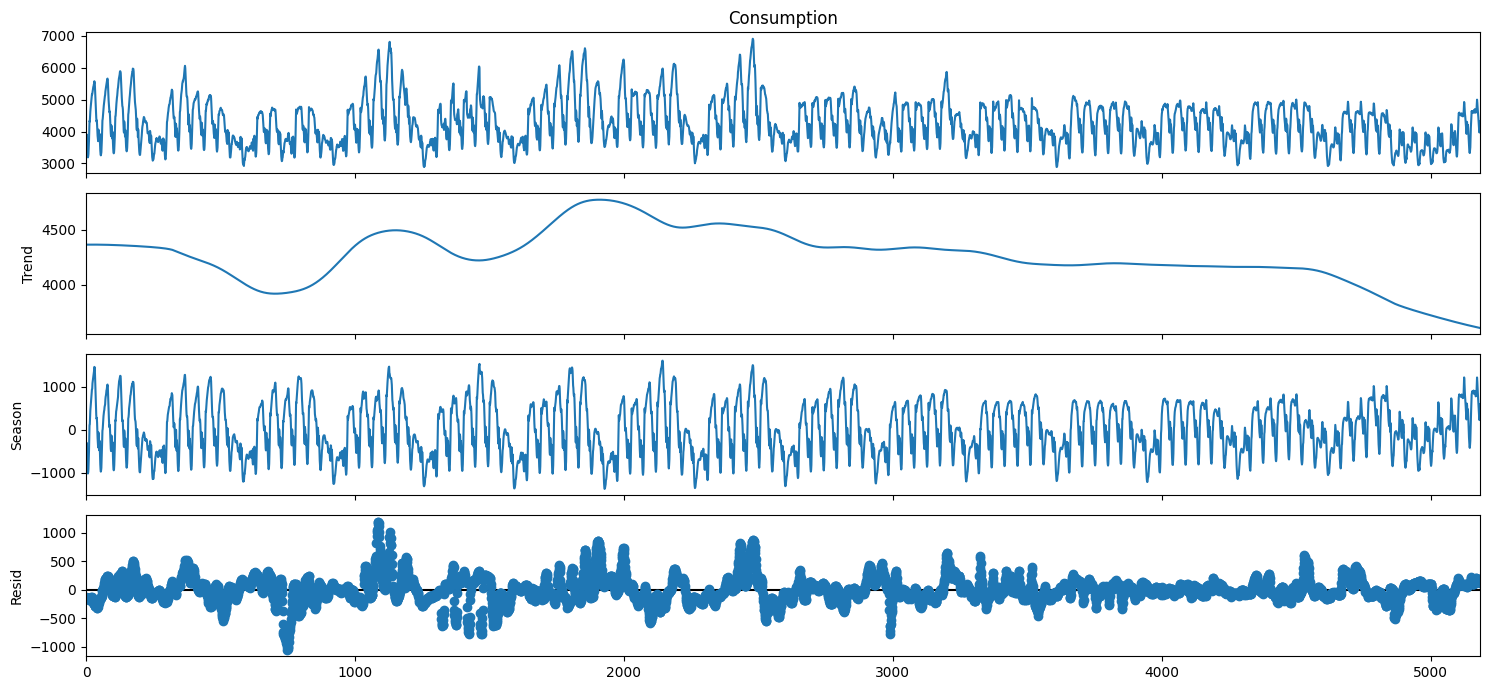

In [8]:
for title,col in zip(['Температура','Потребление электричества'],['Temperature','Consumption']):
    result = STL(train[col], period=48).fit()
    result.plot()
result = STL(train['Consumption'], period=48*7).fit()
result.plot()

*Скольз. средн.:*

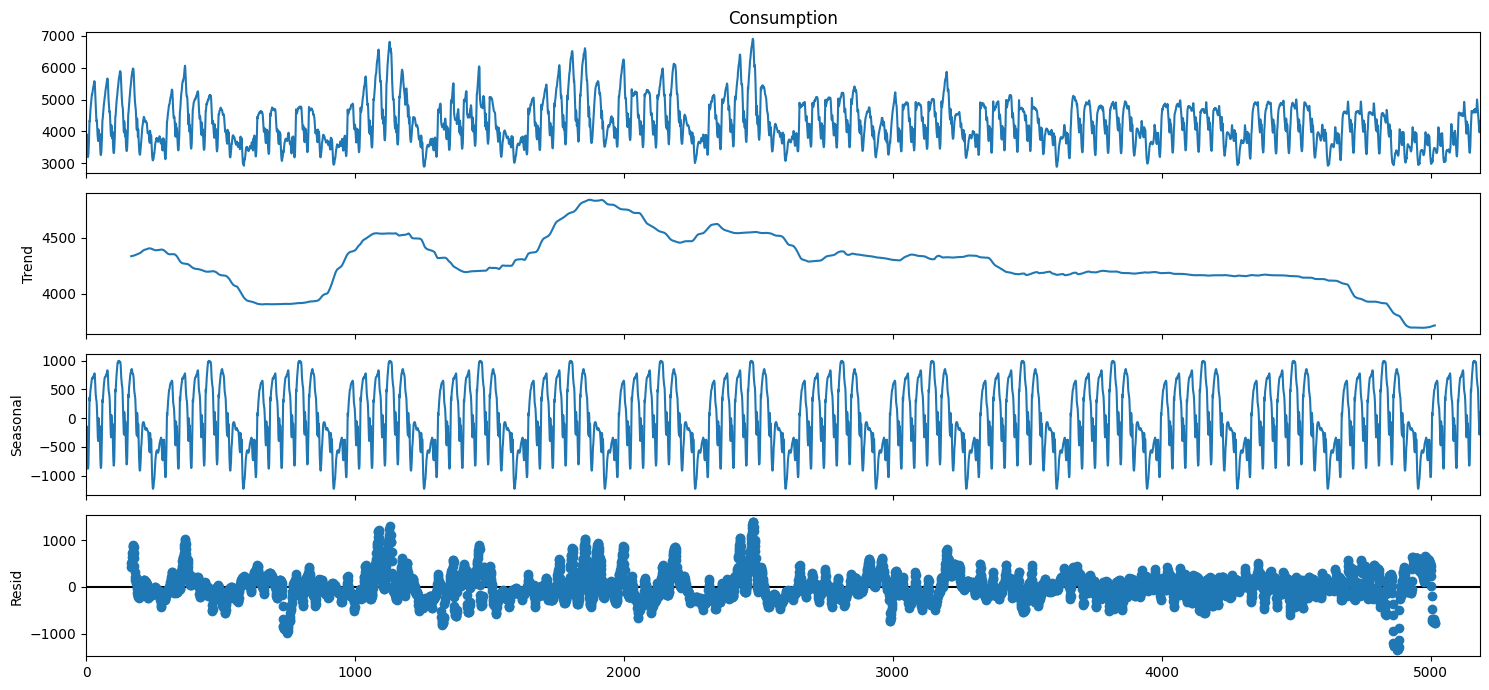

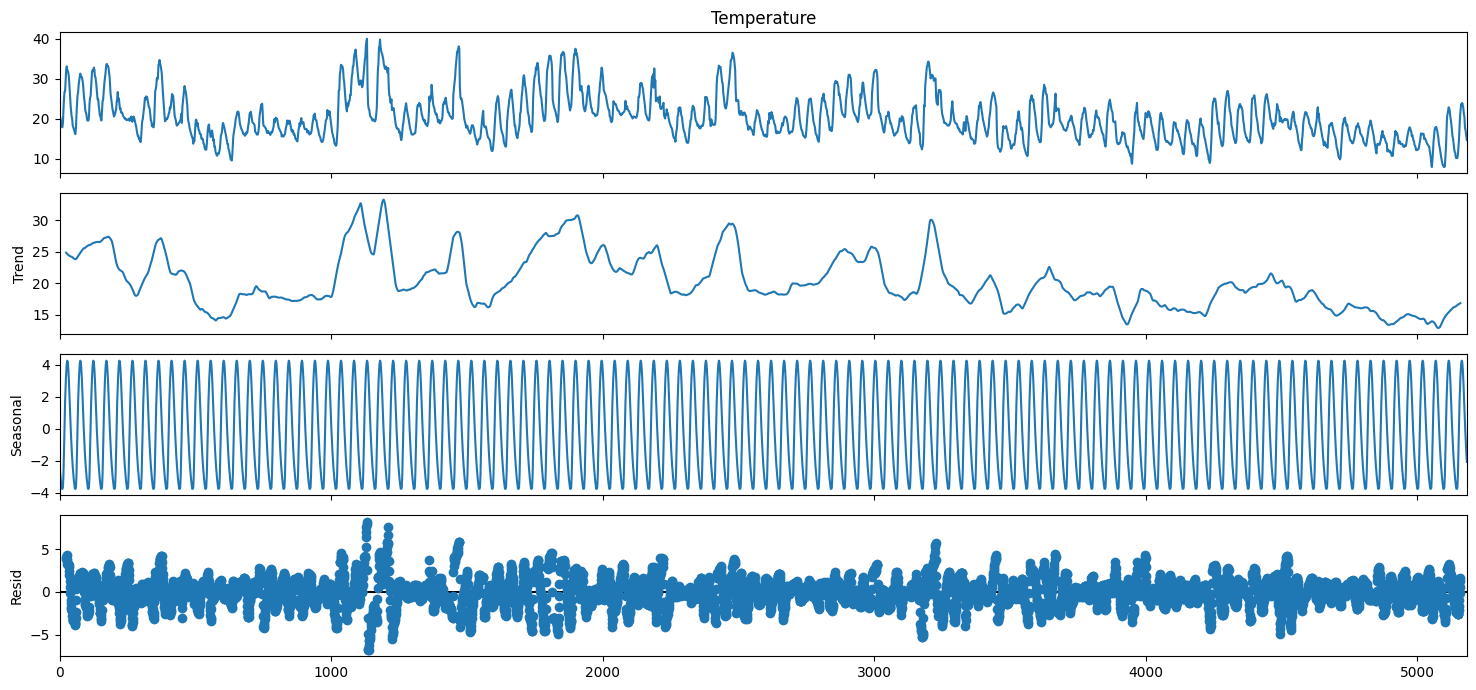

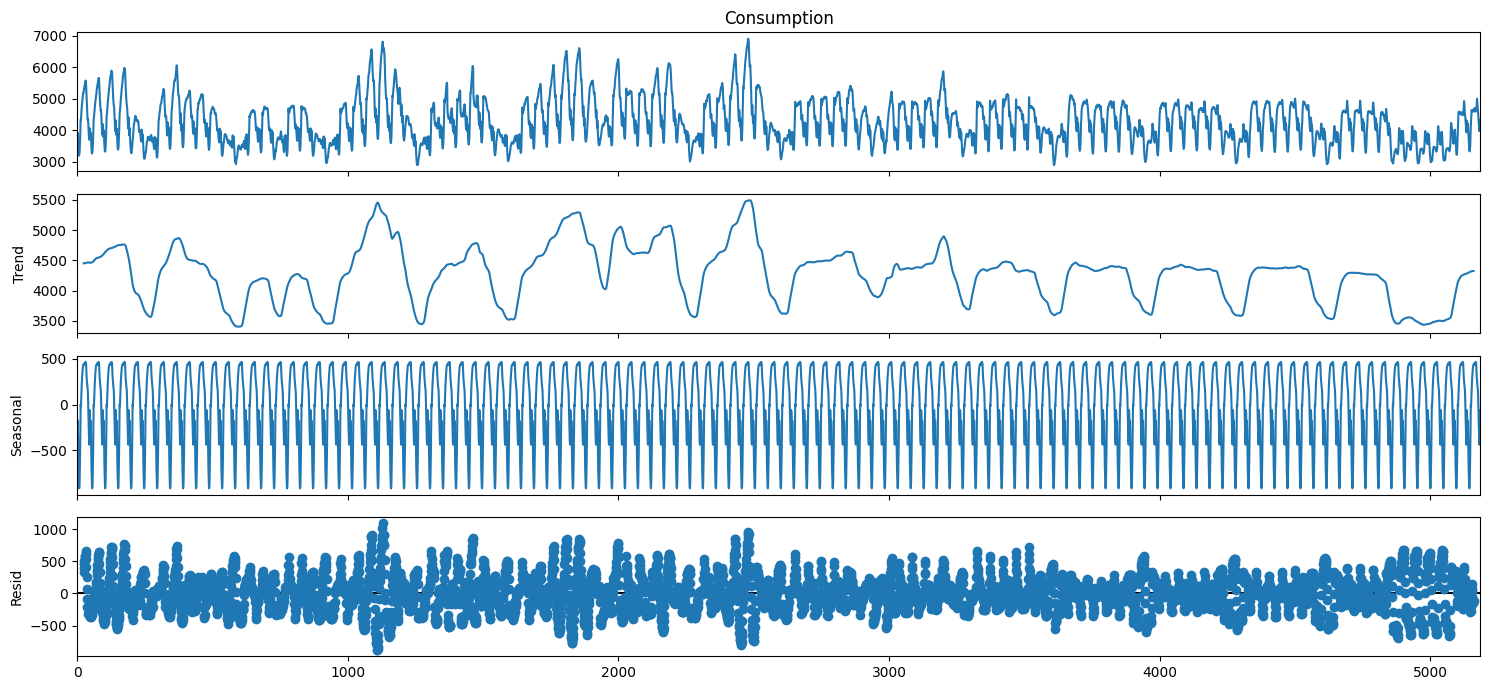

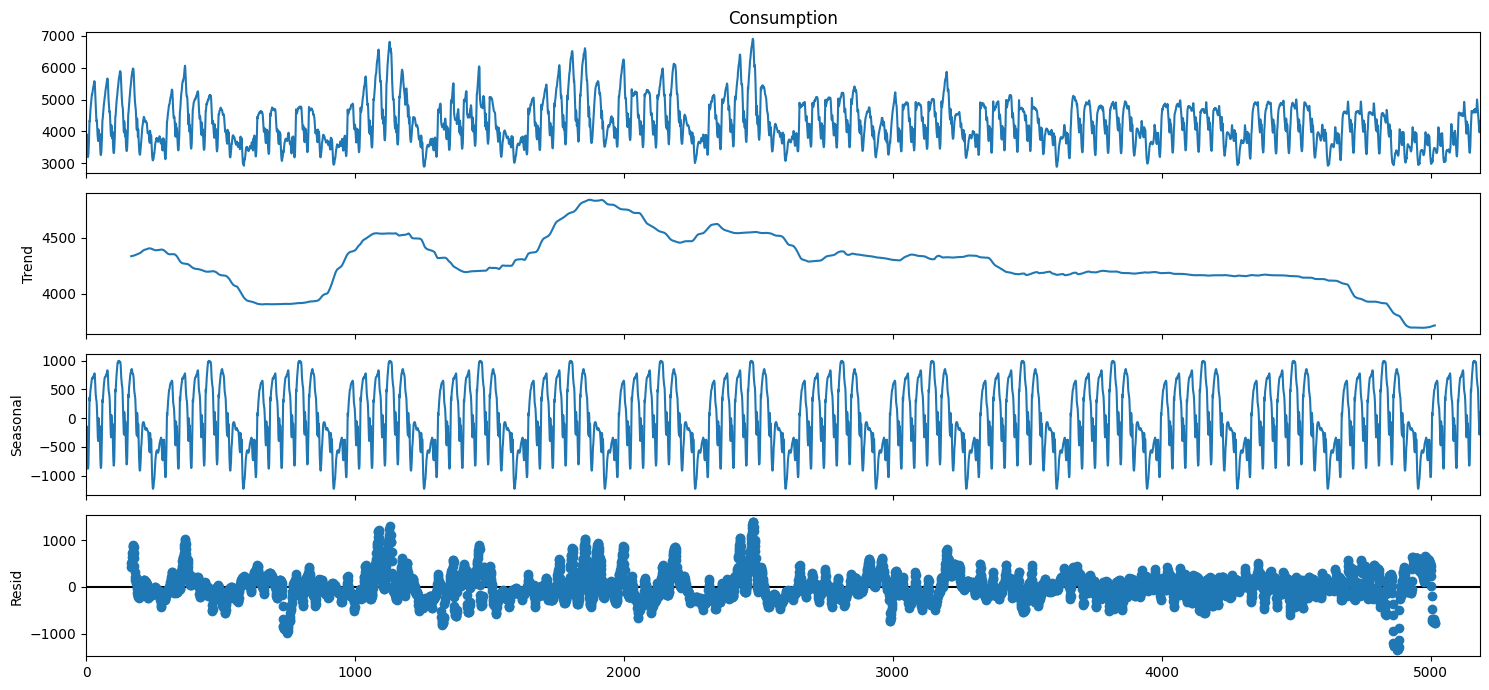

In [9]:
for title,col in zip(['Температура','Потребление электричества'],['Temperature','Consumption']):
    result = seasonal_decompose(train[col], model="additive", period=48)
    result.plot()
result = seasonal_decompose(train['Consumption'], model="additive", period=48*7)
result.plot()

*Если вкратце, то STL лучше. Метод более гибок, подходит для врем. рядов с плавающей сезонностью, устойчив к выбросам. Впрочем, остатки получились похожи*

__5.__ С помощью критериев KPSS и Дики-Фуллера проверьте на стационарность исходные ряды и остатки, полученные после применения STL-декомпозиции. Не забывайте про множественную проверку гипотез.

In [10]:
ts = [
    train['Consumption'], train['Temperature'],  # исход. ряды
    STL(train['Consumption'] - STL(train['Consumption'], period=48*7).fit().seasonal, period=48).fit().resid,  # остаткии
    STL(train.Temperature, period=48).fit().resid
]
multipletests([kpss(x)[1] for x in ts] + [1-adfuller(x)[1] for x in ts], alpha=0.05, method='holm')

(array([False, False, False, False, False, False, False, False]),
 array([0.08, 0.08, 0.6 , 0.6 , 1.  , 1.  , 1.  , 1.  ]),
 0.006391150954545011,
 0.00625)

*КПСС: НЕ отвергаем гипотезу о стационарности*   
*Дики-Фуллер: отвергаем гипотезу о нестационарности*  
*Ряды и остатки стационарны*

__6.__ С помощью экспоненциального сглаживания, модели Хольта и модели Хольта-Уинтерса постройте прогнозы моделей с оптимальными параметрами для *спроса на электричество* на неделю вперед. Как можно выбирать параметр сглаживания $\alpha$? Посчитайте качество прогноза по сравнению с реальными данными на тестовом интервале, используя метрику MSE. Сравните все предсказания.

In [11]:
# <...>

__7.__ Построим модель $\text{SARIMA}$ для предсказания *спроса на электричество*. С помощью преобразований исходного ряда приведите его к стационарному. По графикам ACF и PACF подберите параметры модели $\text{SARIMA}(p, d, q)\times(P, D, Q)_s$. 

*Замечание. Для ускорения вычислений рекомендуется сделать сначала ресэмплинг данных по часам. Подумайте, с каким количеством сезонностей может работать модель $\text{SARIMA}$? Какие типы сезонностей у нас в данных? Для экономии времени и вычислительных ресурсов рекомендуется аккуратно подходить к выбору $P$ и $Q$.*

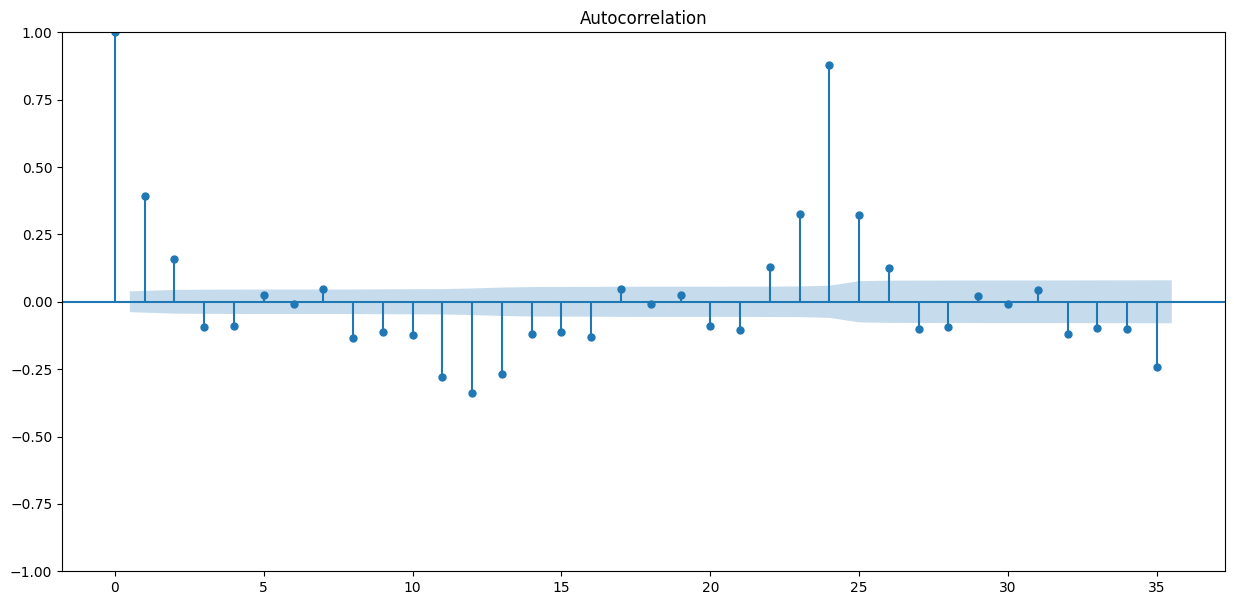

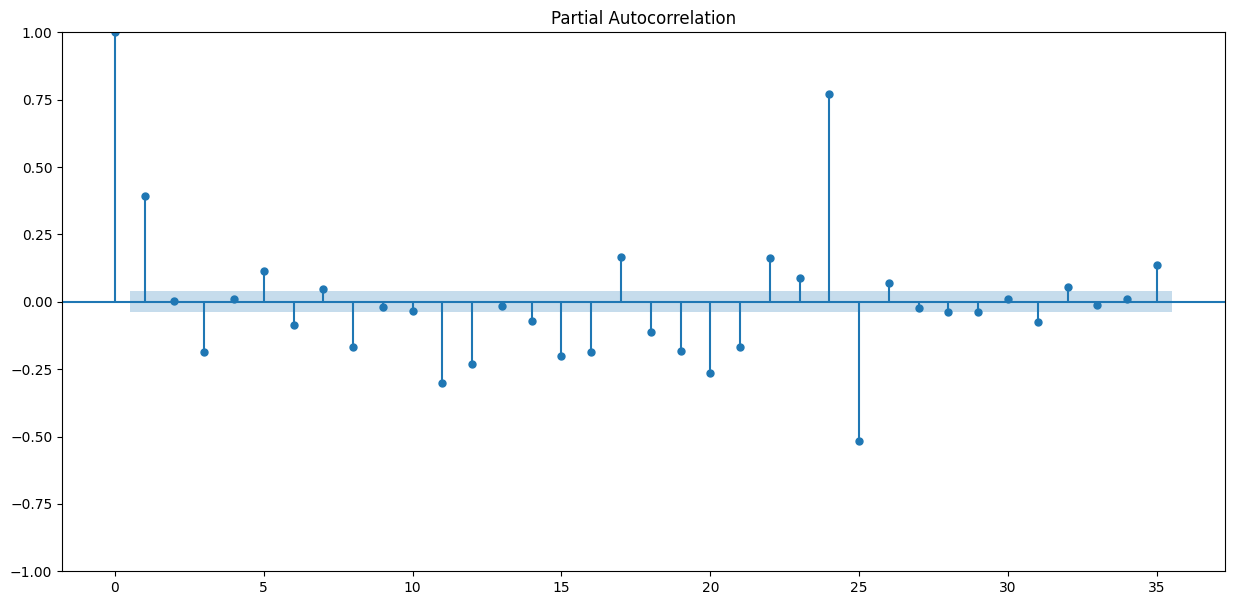

In [12]:
h = train['Consumption'].iloc[::2].values  # данные по получасам -> берем каждую вторую точку (каждый час)
h = h[1:]-h[:-1]
plot_acf(h)
plt.show()
plot_pacf(h)
plt.show()

*Видден пик, соотв. сезонности =24 часа*

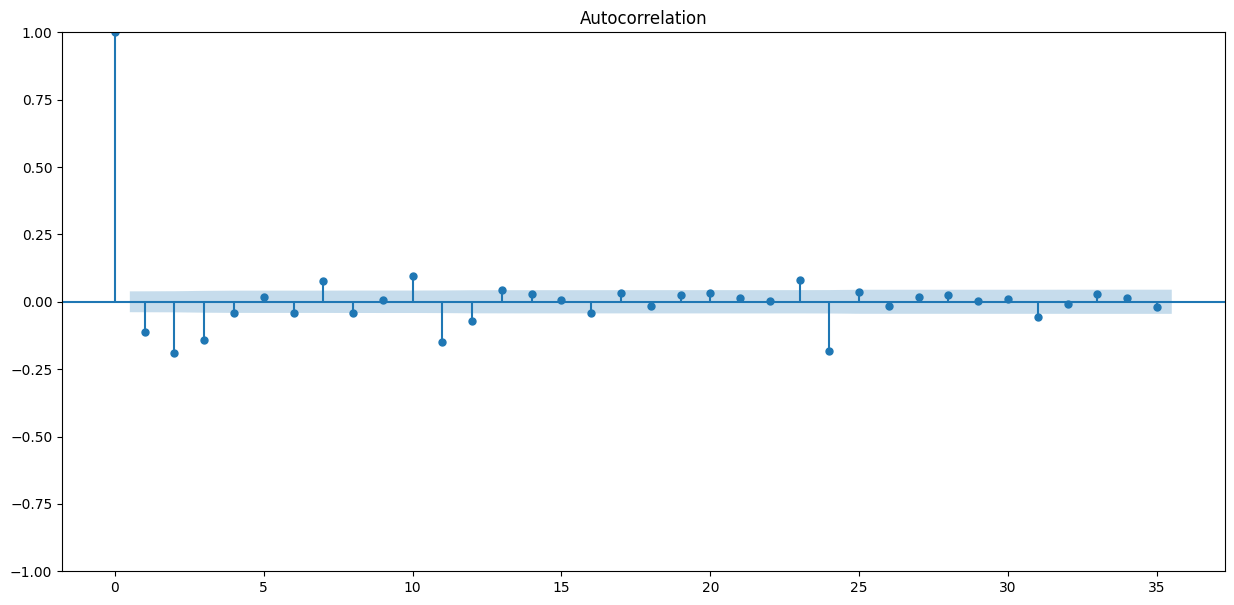

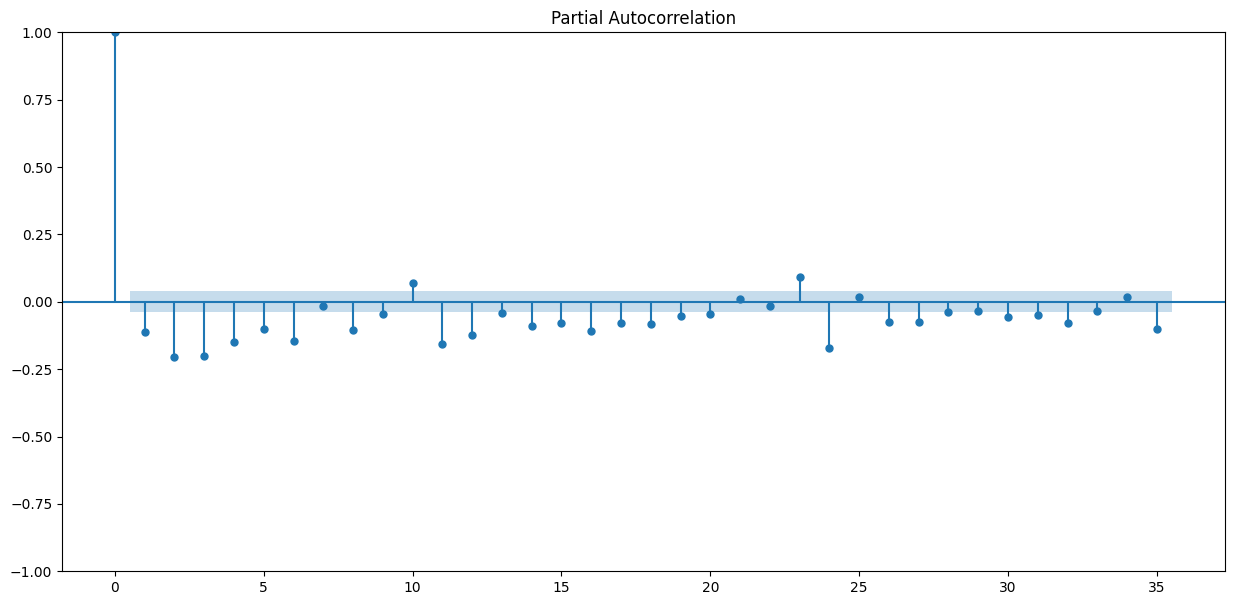

In [13]:
h = h[24:]-h[:-24]
h = h[1:]-h[:-1]
plot_acf(h)
plt.show()
plot_pacf(h)
plt.show()

*Сезонность убрали, коррелограммы говорят о стационарностии ряда*

__8.__  С помощью поиска по сетке вокруг выбранных параметров подберите оптимальные параметры по значению AIC. Учтите, что из сделанных ранее преобразований ряда нужно оставить лишь некоторые. Другие, например, одна из сезонностей будут учтены параметрами модели. Для вашего удобства рекомендуется сохранять промежуточные результаты, например, в какой-нибудь файл.

In [14]:
# <...>

__9.__ Постройте прогнозы модели с оптимальными параметрами на неделю вперед. Посчитайте качество прогноза по сравнению с реальными данными на тестовом интервале, используя метрику MSE.

In [15]:
# <...>

__10.__ Добавьте в модель предсказания электричества экзогенные факторы:
* Значения температуры, используя на тестовом интервале времени истинные значения температуры (*нечестный способ*).
* Значения температуры, используя на тестовом интервале времени предсказания значений температуры. Предсказания можно получить с помощью модели Хольта-Уинтерса, `pmdarima.arima.auto_arima` или `statsforecast.models.AutoARIMA`.
* Использование значений температуры по частям &mdash; для получения прогноза $\widehat{y}_{T+h|T}$ строится своя модель по временному ряду $y_{h}, ..., y_T$ со сдвинутым влево рядом экзогенного фактора $x_{1}, ..., x_{T-h}$. Тогда для получения прогноза $\widehat{y}_{T+h|T}$ нужно знать значения $x_{T-h+1}, ..., x_{T}$, которые известны на момент построения модели.

In [16]:
# <...>

__11.__ Постройте предсказания временного ряда для электричества, используя библиотеку `prophet`. Визуализируйте предсказания и отдельные его компоненты.

23:15:33 - cmdstanpy - INFO - Chain [1] start processing
23:15:34 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-04-27 23:30:00,3734.235375,3079.067662,4058.350958,3734.214483,3734.767445,-144.145035,-144.145035,-144.145035,-201.799553,-201.799553,-201.799553,57.654518,57.654518,57.654518,0.0,0.0,0.0,3590.090340
1,2000-04-28 23:30:00,3713.367491,2389.425925,3332.874184,3701.007851,3726.343474,-850.591581,-850.591581,-850.591581,-201.799553,-201.799553,-201.799553,-648.792028,-648.792028,-648.792028,0.0,0.0,0.0,2862.775910
2,2000-04-29 23:30:00,3692.499607,2626.627257,3596.615027,3661.834944,3723.008129,-579.521789,-579.521789,-579.521789,-201.799553,-201.799553,-201.799553,-377.722236,-377.722236,-377.722236,0.0,0.0,0.0,3112.977818


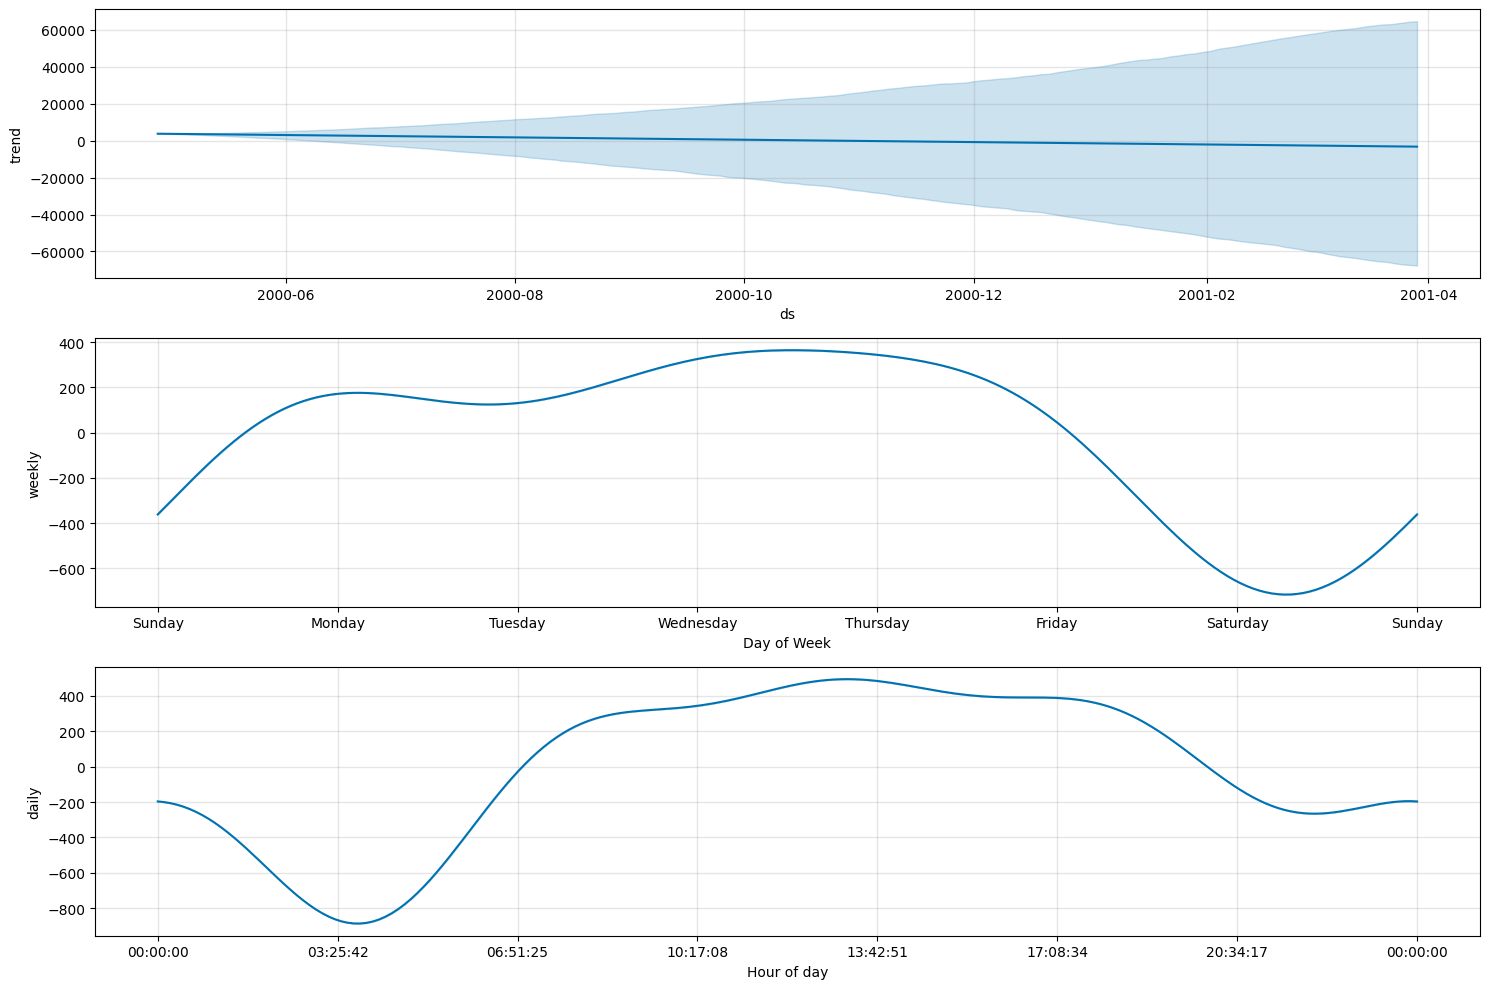

In [17]:
prophet_model = Prophet()
prophet_model.fit(pd.DataFrame({'ds':pd.Timestamp('2000-01-10')+pd.to_timedelta(train['Time']*0.5,'hours'), 'y':train.Consumption}))  # с 10 янв 2000

y_prophet_forecast = prophet_model.predict(prophet_model.make_future_dataframe(periods=48*7, include_history=False))
display(y_prophet_forecast.head(3))

prophet_model.plot_components(y_prophet_forecast, figsize=(15, 10))
plt.show()

*Кажется, модель справляется. Виден провал на выходных и ночью*

__12.__ Сравните все предсказания по метрике MSE. Какая модель оказалась лучшей? Сделайте выводы.

In [18]:
# <...>